In [2]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import import_ipynb
from sklearn.model_selection import GroupShuffleSplit
import numpy_indexed as npi
from scipy import stats
import qgrid
from sklearn.metrics import make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
from PIPELINE_CLASS import *

### Leer dataset

In [3]:
PATHDATA_MFFC_AVG = '../../../data/audios_MFCC_average_5000_tracks.csv'
df = pd.read_csv(PATHDATA_MFFC_AVG, header = None)
data = df.values #Convertimos en un  numpy array

In [4]:
X = data[:,0:-3]
Y = data[:,-2]
print('Tamaño dataSet', X.shape)
print('\n')
Y=  np.reshape(Y,(np.size(Y,0),1))
groups = data[:,-1]
tracks = data[:,-3:-2]

Tamaño dataSet (53867, 20)




In [5]:
FOLDS = 10
TRAIN_SIZE = 0.8


# MLP

## 1. Mejor modelo

Usamos X_train_original y Y_train__original para seleccionar la mejor combinación de parametros y posteriormente validar dichos res]ultados con el conjunto X_test__original y Y_test__original.

<b>Nota:</b> el conjunto X_train_original se divide en dos conjuntos train y dev a una proporción de 80 a 20.

In [6]:
clases =['yes','no','right','five','nine']
PIPELINE= PIPELINE_MULTIPLES_INST(X,Y,groups,tracks,FOLDS,TRAIN_SIZE,clases)

Número de clases: 5
Número de hablantes diferentes 668
Número de audios diferentes 5000
### Info TRAIN
X (44327, 20)
Groups 534
Tracks 4111
### Info TEST
X (9540, 20)
Groups 134
Tracks 889


# Probamos multiples combinaciones

##  hidden_layer_sizes 36,36

In [7]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36))
model_trained_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Accuracy:  0.3689538807649044 


classification report :
               precision    recall  f1-score   support

         0.0       0.43      0.18      0.25       170
         1.0       0.82      0.27      0.41       181
         2.0       0.38      0.38      0.38       185
         3.0       0.28      0.79      0.41       189
         4.0       1.00      0.18      0.30       164

    accuracy                           0.37       889
   macro avg       0.58      0.36      0.35       889
weighted avg       0.57      0.37      0.35       889



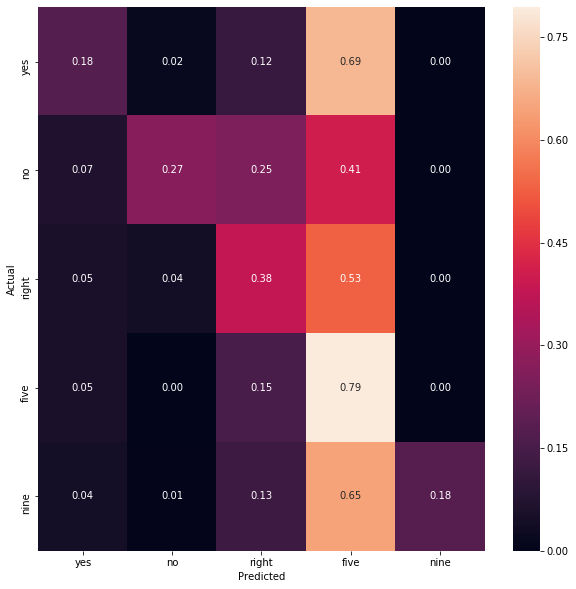

              precision    recall  f1-score   support

         0.0       0.43      0.18      0.25       170
         1.0       0.82      0.27      0.41       181
         2.0       0.38      0.38      0.38       185
         3.0       0.28      0.79      0.41       189
         4.0       1.00      0.18      0.30       164

    accuracy                           0.37       889
   macro avg       0.58      0.36      0.35       889
weighted avg       0.57      0.37      0.35       889



In [8]:
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36)
print(report)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.p

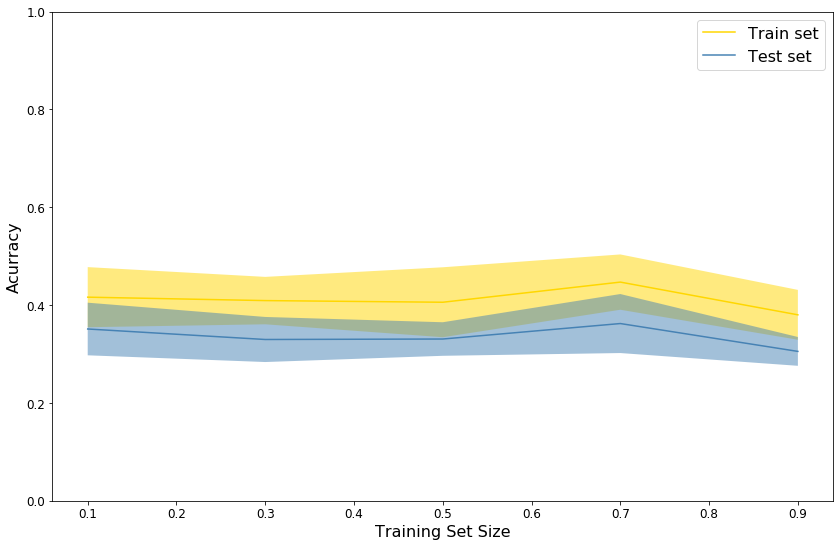

In [9]:
df_split_params = PIPELINE.learning_curve(model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)


##  hidden_layer_sizes 36,36,36

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Accuracy:  0.4904386951631046 


classification report :
               precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



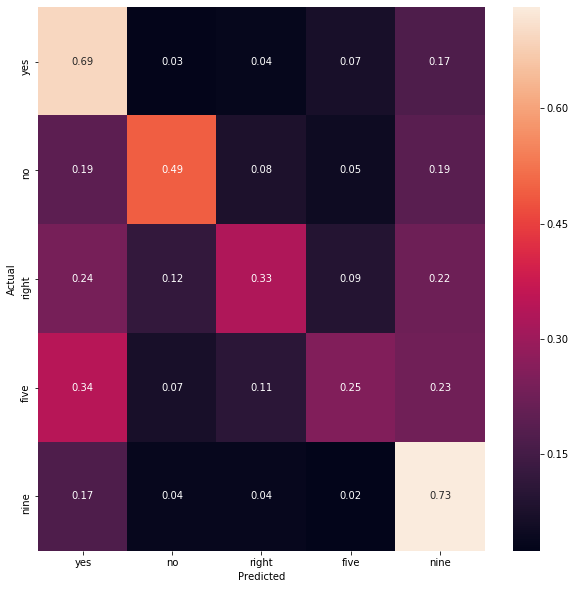

              precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(36,36,36))
model_trained_36_36_36,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_36_36_36)
print(report)

##  hidden_layer_sizes 32,32

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

Accuracy:  0.30033745781777277 


classification report :
               precision    recall  f1-score   support

         0.0       0.68      0.08      0.14       170
         1.0       0.23      0.98      0.38       181
         2.0       0.33      0.02      0.03       185
         3.0       0.50      0.03      0.06       189
         4.0       0.78      0.41      0.54       164

    accuracy                           0.30       889
   macro avg       0.51      0.30      0.23       889
weighted avg       0.50      0.30      0.22       889



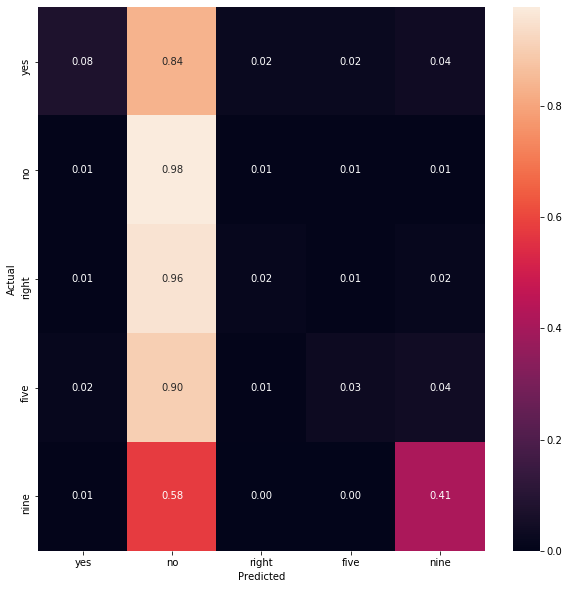

              precision    recall  f1-score   support

         0.0       0.68      0.08      0.14       170
         1.0       0.23      0.98      0.38       181
         2.0       0.33      0.02      0.03       185
         3.0       0.50      0.03      0.06       189
         4.0       0.78      0.41      0.54       164

    accuracy                           0.30       889
   macro avg       0.51      0.30      0.23       889
weighted avg       0.50      0.30      0.22       889



In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32))
model_trained_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32)
print(report)

##  hidden_layer_sizes 32,32,32

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Accuracy:  0.4398200224971879 


classification report :
               precision    recall  f1-score   support

         0.0       0.47      0.32      0.38       170
         1.0       0.54      0.39      0.45       181
         2.0       0.56      0.32      0.41       185
         3.0       0.31      0.78      0.45       189
         4.0       0.92      0.35      0.51       164

    accuracy                           0.44       889
   macro avg       0.56      0.43      0.44       889
weighted avg       0.55      0.44      0.44       889



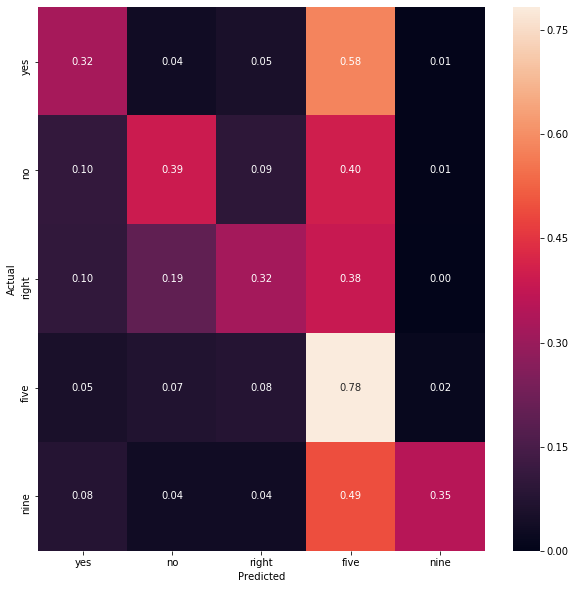

              precision    recall  f1-score   support

         0.0       0.47      0.32      0.38       170
         1.0       0.54      0.39      0.45       181
         2.0       0.56      0.32      0.41       185
         3.0       0.31      0.78      0.45       189
         4.0       0.92      0.35      0.51       164

    accuracy                           0.44       889
   macro avg       0.56      0.43      0.44       889
weighted avg       0.55      0.44      0.44       889



In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(32,32,32))
model_trained_32_32_32,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_32_32_32)
print(report)

##  hidden_layer_sizes 40,40

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

Accuracy:  0.3858267716535433 


classification report :
               precision    recall  f1-score   support

         0.0       0.26      0.84      0.39       170
         1.0       0.58      0.33      0.42       181
         2.0       0.61      0.14      0.22       185
         3.0       0.44      0.25      0.32       189
         4.0       0.83      0.42      0.56       164

    accuracy                           0.39       889
   macro avg       0.54      0.39      0.38       889
weighted avg       0.54      0.39      0.38       889



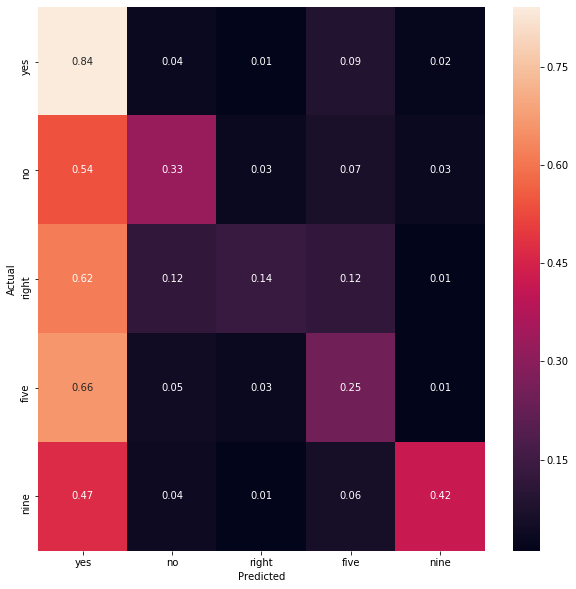

              precision    recall  f1-score   support

         0.0       0.26      0.84      0.39       170
         1.0       0.58      0.33      0.42       181
         2.0       0.61      0.14      0.22       185
         3.0       0.44      0.25      0.32       189
         4.0       0.83      0.42      0.56       164

    accuracy                           0.39       889
   macro avg       0.54      0.39      0.38       889
weighted avg       0.54      0.39      0.38       889



In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40))
model_trained_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40)
print(report)

##  hidden_layer_sizes 40,40,40

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stoch

Accuracy:  0.4746906636670416 


classification report :
               precision    recall  f1-score   support

         0.0       0.45      0.60      0.52       170
         1.0       0.47      0.50      0.48       181
         2.0       0.37      0.62      0.46       185
         3.0       0.48      0.19      0.27       189
         4.0       0.89      0.49      0.63       164

    accuracy                           0.47       889
   macro avg       0.53      0.48      0.47       889
weighted avg       0.53      0.47      0.47       889



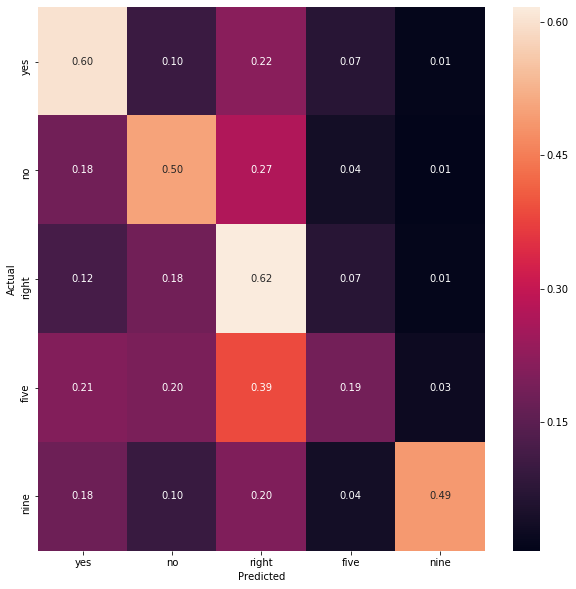

              precision    recall  f1-score   support

         0.0       0.45      0.60      0.52       170
         1.0       0.47      0.50      0.48       181
         2.0       0.37      0.62      0.46       185
         3.0       0.48      0.19      0.27       189
         4.0       0.89      0.49      0.63       164

    accuracy                           0.47       889
   macro avg       0.53      0.48      0.47       889
weighted avg       0.53      0.47      0.47       889



In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(40,40,40))
model_trained_40_40_40,eficiencia_Train,intervalo_Train,eficiencia_Test,intervalo_Test = PIPELINE.TRAIN(mlp,label_request=True)
report = PIPELINE.confusion_matrix_Metrics(model_trained_40_40_40)
print(report)

### La mejor combinación de parametros

#Seleccionamos el modelo con el acurracy mas alto

model_trained_36_36  Accuracy:  0.3689538807649044 
model_trained_36_36_36 Accuracy:  0.4904386951631046 
model_trained_32_32  Accuracy:  0.30033745781777277 
model_trained_32_32_32 Accuracy:  0.4398200224971879 
model_trained_40_40  Accuracy:  0.3858267716535433 
model_trained_40_40_40  Accuracy:  0.4746906636670416 


In [14]:
best_model_trained = model_trained_36_36_36

## 2. Evalución mejor modelo con el conjunto de test

Accuracy:  0.4904386951631046 


classification report :
               precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



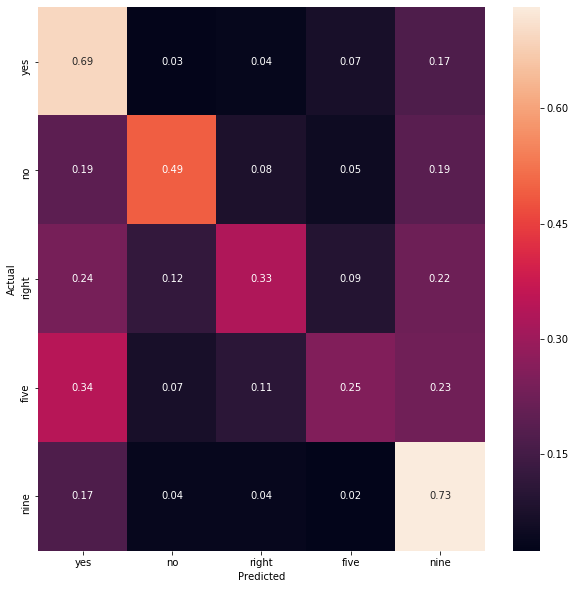

              precision    recall  f1-score   support

         0.0       0.41      0.69      0.51       170
         1.0       0.66      0.49      0.56       181
         2.0       0.57      0.33      0.42       185
         3.0       0.53      0.25      0.34       189
         4.0       0.45      0.73      0.56       164

    accuracy                           0.49       889
   macro avg       0.52      0.50      0.48       889
weighted avg       0.53      0.49      0.48       889



In [15]:
report = PIPELINE.confusion_matrix_Metrics(best_model_trained)
print(report)

## Learning Curve

In [ ]:
df_split_params = PIPELINE.learning_curve(best_model_trained,suptitle='', title='', xlabel='Training Set Size', ylabel='Acurracy',label_request=True)

/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/josearangos/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A 

In [ ]:
df_split_params